In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [32]:
d = pd.read_csv("E:/4.1/Softcom Lab/ass2/city_day.csv/city_day.csv")
d

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [33]:
d.shape

(29531, 16)

In [34]:
d.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [35]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [36]:
d.isnull()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
d.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [38]:
pmean=d["PM2.5"].mean()
d["PM2.5"].fillna(pmean,inplace=True)

In [39]:
pmmean=d["PM10"].mean()
d["PM10"].fillna(pmmean,inplace=True)

In [40]:
nmean=d["NO"].mean()
d["NO"].fillna(nmean,inplace=True)

In [41]:
nomean=d["NO2"].mean()
d["NO2"].fillna(nomean,inplace=True)

In [42]:
noxmean=d["NOx"].mean()
d["NOx"].fillna(noxmean,inplace=True)

In [43]:
nhmean=d["NH3"].mean()
d["NH3"].fillna(nhmean,inplace=True)

In [44]:
cmean=d["CO"].mean()
d["CO"].fillna(cmean,inplace=True)

In [45]:
smean=d["SO2"].mean()
d["SO2"].fillna(smean,inplace=True)

In [46]:
omean=d["O3"].mean()
d["O3"].fillna(omean,inplace=True)

In [47]:
bmean=d["Benzene"].mean()
d["Benzene"].fillna(bmean,inplace=True)

In [48]:
tmean=d["Toluene"].mean()
d["Toluene"].fillna(tmean,inplace=True)

In [49]:
xmean=d["Xylene"].mean()
d["Xylene"].fillna(xmean,inplace=True)

In [50]:
amean=d["AQI"].mean()
d["AQI"].fillna(amean,inplace=True)

In [51]:
d.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [52]:
d

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


Mean Squared Error: 2810.9006379613948
R-squared: 0.8202019034876057


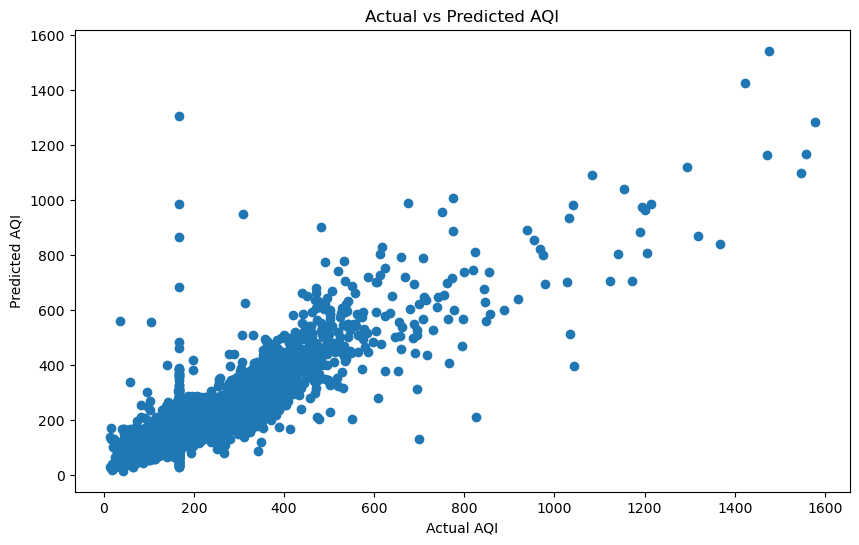

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features and target variable
features = ['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
X = d[features]
y = d['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the actual vs predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()


Epoch 1/20


e:\Anaconda\anaAPP\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0025 - val_loss: 5.8968e-04
Epoch 2/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0015 - val_loss: 5.3152e-04
Epoch 3/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - val_loss: 4.7132e-04
Epoch 4/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011 - val_loss: 4.8232e-04
Epoch 5/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - val_loss: 5.6780e-04
Epoch 6/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - val_loss: 5.0642e-04
Epoch 7/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011 - val_loss: 5.2195e-04
Epoch 8/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011 - val_loss: 5.0282e-04
Epoch 9/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011 - val_loss: 4.9733e-04
Epoch 10/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.7547e-04 - val_loss: 5.6853e-04
Epoch 11/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.7244e-04 - val_loss: 4.4653e-04
Epoch 12/20

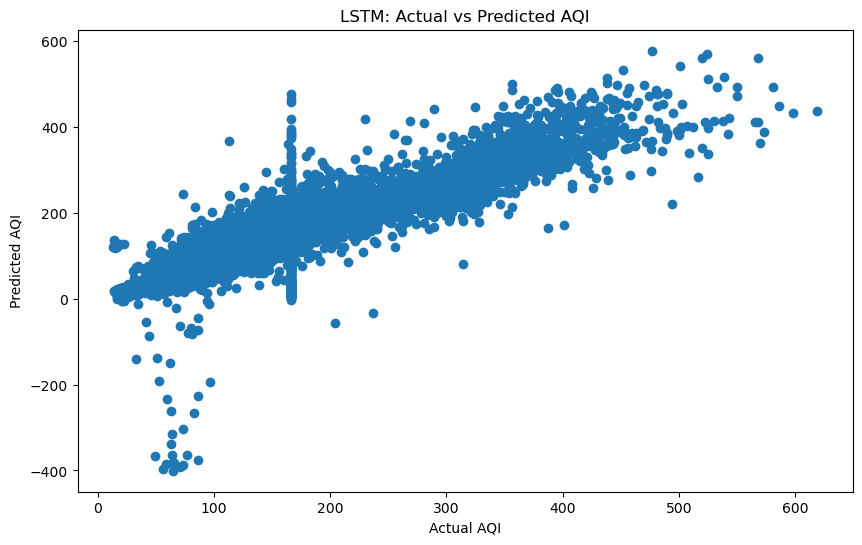

In [54]:
from sklearn.preprocessing import MinMaxScaler  # Add this line
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Scaling only the AQI column, not the entire dataset
aqi_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_aqi = aqi_scaler.fit_transform(d[['AQI']])

# Feature scaling for the rest of the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(d[features])

# Creating sequences for LSTM
def create_sequences(data, time_step=5):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])  # Only features
        y.append(scaled_aqi[i + time_step])  # Scaled AQI as target
    return np.array(X), np.array(y)

time_step = 10
X, y = create_sequences(scaled_data, time_step)

# Splitting the data into training and testing sets (70% train, 30% test)
train_size = int(len(X) * 0.7)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict using the LSTM model
train_predict = model_lstm.predict(X_train)
test_predict = model_lstm.predict(X_test)

# Inverse transform only the AQI values
train_predict = aqi_scaler.inverse_transform(train_predict)
test_predict = aqi_scaler.inverse_transform(test_predict)

# Evaluate the model
mse_lstm = mean_squared_error(aqi_scaler.inverse_transform(y_test), test_predict)
r2_lstm = r2_score(aqi_scaler.inverse_transform(y_test), test_predict)

print(f'LSTM Model - Mean Squared Error: {mse_lstm}')
print(f'LSTM Model - R-squared: {r2_lstm}')

# Plot actual vs predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(aqi_scaler.inverse_transform(y_test), test_predict)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('LSTM: Actual vs Predicted AQI')
plt.show()


In [57]:
# Save the model to a file
model_lstm.save('lstm_model.h5')
print("Model saved successfully.")

Model saved successfully.


In [55]:
pip install hmmlearn

   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/127.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/127.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/127.0 kB 435.7 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/127.0 kB 491.5 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/127.0 kB 525.1 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/127.0 kB 525.1 kB/s eta 0:00:01
   ------------------------------------ - 122.9/127.0 kB 514.3 kB/s eta 0:00:01
   -------------------------------------- 127.0/127.0 kB 499.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


HMM Model - Mean Squared Error: 46394.44884832862
HMM Model - R-squared: -1.7852754043404304


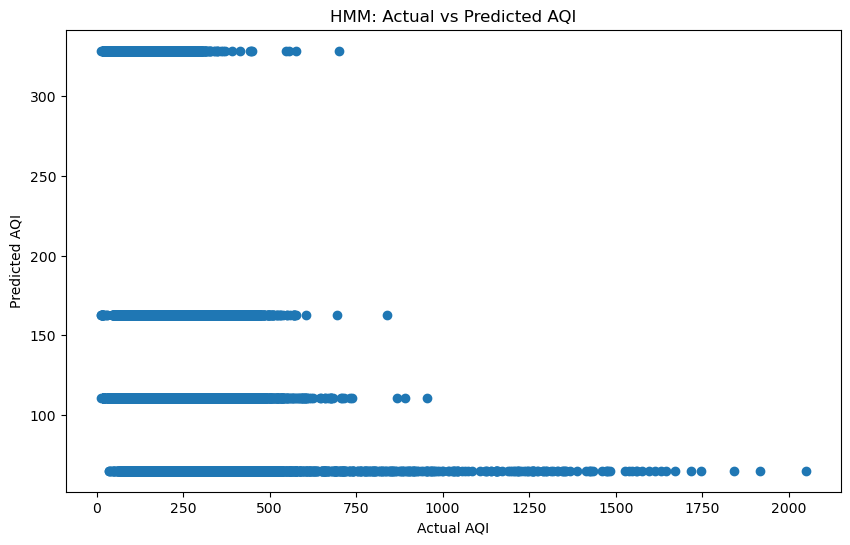

In [56]:
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder

# Discretize AQI into categorical states (using quantiles)
n_states = 4  # Adjust based on needs
aqi_states = pd.qcut(d['AQI'], n_states, labels=False)  # Create AQI states

# Prepare the feature data for HMM
X_hmm = d[features].values  # Use only features
lengths = [len(X_hmm)]  # Full length of the dataset

# Initialize and fit GaussianHMM model
model_hmm = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)
model_hmm.fit(X_hmm)

# Predict hidden states
hidden_states = model_hmm.predict(X_hmm)

# Convert hidden states back to AQI values using mean AQI of each state
state_means = d.groupby(aqi_states)['AQI'].mean()
predicted_aqi_values = state_means[hidden_states].values

# Evaluate the HMM model
mse_hmm = mean_squared_error(d['AQI'], predicted_aqi_values)
r2_hmm = r2_score(d['AQI'], predicted_aqi_values)

print(f'HMM Model - Mean Squared Error: {mse_hmm}')
print(f'HMM Model - R-squared: {r2_hmm}')

# Plot Actual vs Predicted AQI (HMM)
plt.figure(figsize=(10, 6))
plt.scatter(d['AQI'], predicted_aqi_values)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('HMM: Actual vs Predicted AQI')
plt.show()
